# Time Series Analysis of Apple Stock Price Dataset using SARIMA and LSTM

### SARIMA

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [36]:
file_path = 'C:/Users/beher/Downloads/apple_share_price.csv'
stock_data = pd.read_csv(file_path)
stock_data


,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
...,...,...,...,...,...,...
1659,7-Jan-11,47.71,48.05,47.41,48.02,77982212
1660,6-Jan-11,47.82,47.89,47.56,47.68,75106626
1661,5-Jan-11,47.08,47.76,47.07,47.71,63879193
1662,4-Jan-11,47.49,47.50,46.88,47.33,77337001


In [37]:
stock_data['average_price'] = stock_data[['High', 'Low', 'Close']].mean(axis=1)

In [38]:
time_series_data = stock_data[['Date', 'average_price']]
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])

In [5]:
time_series_data.set_index('Date', inplace=True)

In [6]:
time_series_data.fillna(method='ffill', inplace=True)

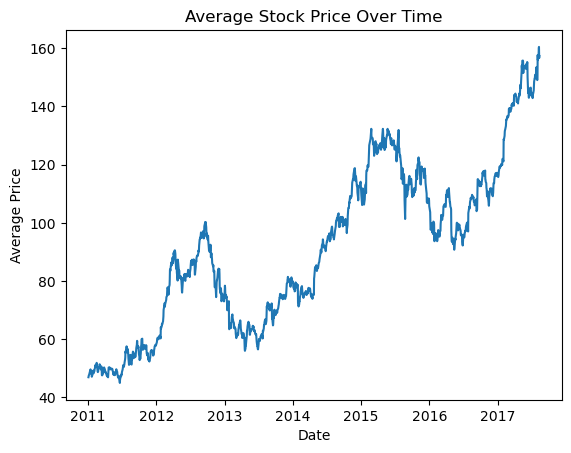

In [7]:
sns.lineplot(data=time_series_data, x='Date', y='average_price')
plt.ylabel('Average Price')
plt.title('Average Stock Price Over Time')
plt.show()

In [8]:
monthly_avg_data = time_series_data.resample('M').mean()

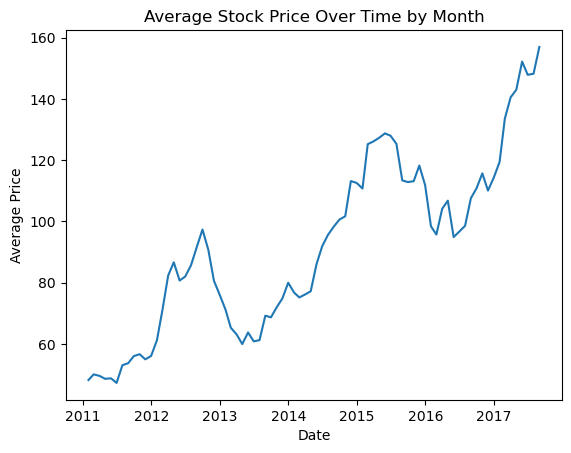

In [9]:
sns.lineplot(data=monthly_avg_data, x='Date', y='average_price')
plt.ylabel('Average Price')
plt.title('Average Stock Price Over Time by Month')
plt.show()

In [20]:
filter_start_date = "2014-01-02"
filter_end_date = "2017-08-11"

In [21]:
date_filter = (time_series_data.index >= filter_start_date) & (time_series_data.index <= filter_end_date)
filtered_time_series = time_series_data[date_filter]

In [22]:
monthly_filtered_data = filtered_time_series.resample('M').mean()

In [23]:
ts_values = monthly_filtered_data['average_price'].values  
adf_result = adfuller(ts_values)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')
    
# Since the value of p is much higher than 0.05, null hypothesis failed to reject

ADF Statistic: -0.5394176589571
p-value: 0.8840921901400821
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


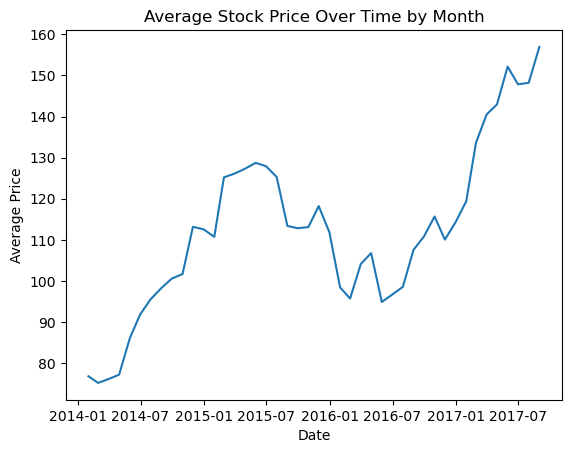

In [24]:
sns.lineplot(data=monthly_filtered_data, x='Date', y='average_price')
plt.ylabel('Average Price')
plt.title('Average Stock Price Over Time by Month')
plt.show()

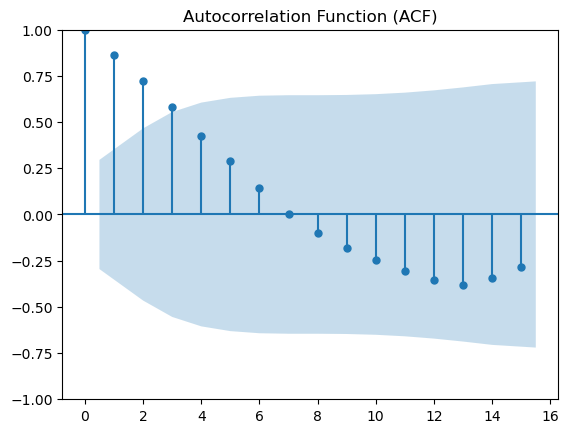

In [25]:
plot_acf(ts_values, lags=15)
plt.title('Autocorrelation Function (ACF)')
plt.show()

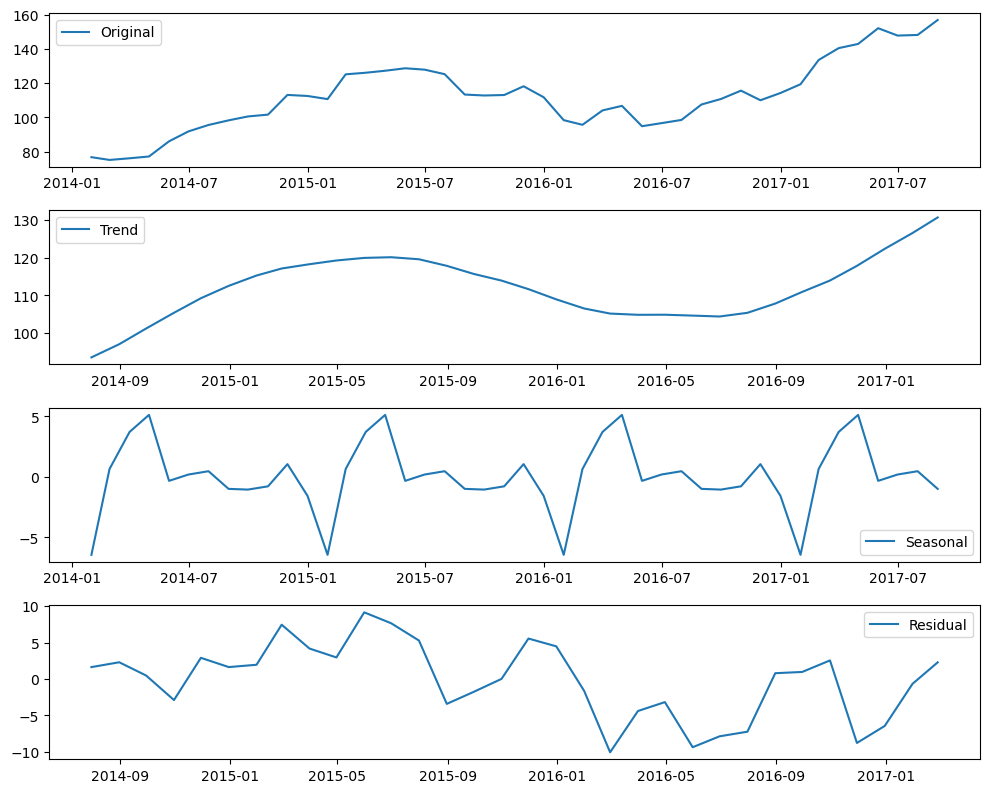

In [26]:
decomposition = seasonal_decompose(monthly_filtered_data, model='additive')
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(monthly_filtered_data, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
train = monthly_filtered_data[:int(0.8*len(monthly_filtered_data))]
test = monthly_filtered_data[int(0.8*len(monthly_filtered_data)):]

MAE: 11.759139019100756, RMSE: 14.885567968036426


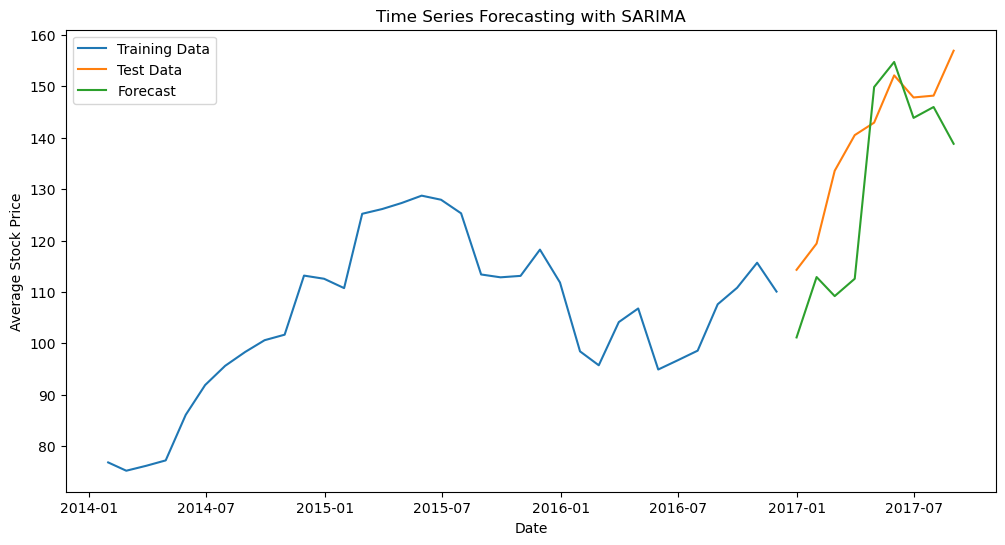

In [62]:
sarima_model = SARIMAX(train['average_price'], order=(0, 0, 1), seasonal_order=(2, 1, 1, 13))
sarima_results = sarima_model.fit()


forecast = sarima_results.forecast(steps=len(test))
test['forecast'] = forecast

mae = mean_absolute_error(test['average_price'], test['forecast'])
rmse = mean_squared_error(test['average_price'], test['forecast'], squared=False)
print(f'MAE: {mae}, RMSE: {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['average_price'], label='Training Data')
plt.plot(test.index, test['average_price'], label='Test Data')
plt.plot(test.index, test['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.title('Time Series Forecasting with SARIMA')
plt.legend()
plt.show()